# Telcom Churn Case Study

#### In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

- For many incumbent operators, retaining high profitable customers is the number one business goal.

- To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

### High level steps

- Data preprocessing, Checking/Handeling Null values 

- EDA for data undersatding

- Derive new features.

- Reduce the number of variables using PCA.

- Model Building and Hyperparmeter tunig.

- Model Evaluation

- Model Selection

In [1]:
#importing important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

In [2]:
telecom = pd.read_csv('telecom_churn_data.csv')

In [3]:
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
telecom.shape

(99999, 226)

In [5]:
telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


### Missing values analysis handeling

In [6]:
# checking column that has only one values such columns have no variance and not useful for modeling
col_wth_one_val = [i for i in telecom.columns if telecom[i].nunique() == 1 ]

##### We can dorp these columns as there is no actual information available.

In [7]:
telecom = telecom.drop(col_wth_one_val,axis=1)

In [8]:
telecom.shape

(99999, 210)

In [9]:
#Check rows with high percentage of rows with missing values
telecom['mis_val_row'] = (telecom.isnull().sum(axis=1)/len(telecom.columns))*100
telecom[telecom['mis_val_row']>70]

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,...,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,mis_val_row
201,7000669827,45.000,46.50,46.500,45.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1069,0.0,0.0,0.0,0.0,71.428571
202,7001788209,126.339,0.00,0.000,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,925,0.0,0.0,0.0,0.0,71.904762
232,7000621478,0.700,0.00,108.460,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,671,0.0,0.0,0.0,0.0,71.904762
275,7000464930,90.208,0.00,0.000,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,318,0.0,0.0,0.0,0.0,71.904762
279,7002323802,0.900,0.00,106.760,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,663,0.0,0.0,0.0,0.0,71.904762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98933,7001771443,0.160,0.00,167.009,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1142,0.0,0.0,0.0,0.0,71.904762
99383,7002179001,0.000,154.71,-5.000,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,517,0.0,0.0,0.0,0.0,71.428571
99856,7001554695,0.000,20.00,219.000,189.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,678,0.0,0.0,0.0,0.0,70.476190
99978,7000668515,30.000,31.00,2411.850,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,852,0.0,0.0,0.0,0.0,71.428571


#### There are 567 rows with more than 70 % data missing since this is very small number of rows comparing to original dataset we can drop this rows.

In [10]:
#droping rows with high values of missing values
telecom = telecom[telecom['mis_val_row']<70]
telecom.shape

(99432, 211)

In [11]:
#droping  column mis_val_row 
telecom = telecom.drop('mis_val_row',axis=1)

In [12]:
# function to check missing values percentage in each column in dataframe 
def miss_val(df):
    col = []
    mis_val = []
    #mis_df = pd.DataFrame()
    for i in range(len(df.columns)):
        if telecom[df.columns[i]].isnull().sum() > 0:
            col.append(df.columns[i]) 
            mis_val.append(round(((df[df.columns[i]].isnull().sum()/len(df))*100),3))
    mis_df = pd.DataFrame(list(zip(col, mis_val)),columns=['Col_Nm','Miss_Val_PCT'])
    return mis_df

In [13]:
mis_df= pd.DataFrame(miss_val(telecom))

In [14]:
#checking column which has more than 70% missing values.
telecom[mis_df['Col_Nm'][mis_df['Miss_Val_PCT'] > 70 ].tolist()]

,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,...,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9
0,6/21/2014,7/16/2014,8/8/2014,NaN,1.0,1.0,1.0,NaN,252.0,252.0,...,212.17,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN
1,NaN,7/25/2014,8/10/2014,NaN,NaN,1.0,2.0,NaN,NaN,154.0,...,7.60,NaN,NaN,0.0,0.0,NaN,NaN,1.0,1.0,NaN
2,NaN,NaN,NaN,9/17/2014,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6/4/2014,NaN,NaN,NaN,1.0,NaN,NaN,NaN,56.0,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99996,6/13/2014,NaN,NaN,NaN,2.0,NaN,NaN,NaN,25.0,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
99997,6/17/2014,7/19/2014,8/20/2014,9/17/2014,3.0,2.0,4.0,4.0,202.0,179.0,...,602.68,725.68,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0


###### Since these colum have 70% missing values, they are not going to help in analysis and model building, so droping those column.

In [15]:
telecom = telecom.drop(mis_df['Col_Nm'][mis_df['Miss_Val_PCT'] > 70 ].tolist(),axis=1)

In [16]:
telecom.shape

(99432, 170)

#### columns of dataframe is came down to 186 lest see remaining missing values.

In [17]:
mis_df= pd.DataFrame(miss_val(telecom))

In [18]:
mis_df.describe()

,Miss_Val_PCT
count,112.000000
mean,4.614554
std,1.625590
min,1.399000
25%,3.311000
50%,3.389000
75%,4.838000
max,7.219000


In [19]:
list(telecom[mis_df['Col_Nm'].tolist()].select_dtypes(include=['object']).columns)

['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9']

For 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9' Lets see what is amount and number of recharge done by customer in respected month where last recharge date is empty.

In [20]:
#checking Total recharge amout and # of recharege whrer last recharge date is null

print(telecom[['last_day_rch_amt_6','total_rech_amt_6']][telecom['date_of_last_rech_6'].isnull()].sum())
print(telecom[['total_rech_num_7','total_rech_amt_7']][telecom['date_of_last_rech_7'].isnull()].sum())
print(telecom[['total_rech_num_8','total_rech_amt_8']][telecom['date_of_last_rech_8'].isnull()].sum())
print(telecom[['total_rech_num_9','total_rech_amt_9']][telecom['date_of_last_rech_9'].isnull()].sum())

last_day_rch_amt_6    0
total_rech_amt_6      0
dtype: int64
total_rech_num_7    0
total_rech_amt_7    0
dtype: int64
total_rech_num_8    0
total_rech_amt_8    0
dtype: int64
total_rech_num_9    0
total_rech_amt_9    0
dtype: int64


Looks like this is valid empty values as customer has not done any recharge so the last rechrge date is not available for particular month.Droping these columns

In [21]:
#droping date and mobile number as its not going to help in model building 
telecom = telecom.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9','mobile_number'],axis=1)

#### Since the missing values are very less per columns, imputing numerical columns with Median 

In [22]:
mis_df= pd.DataFrame(miss_val(telecom))
telecom[mis_df['Col_Nm'].tolist()].describe()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,...,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9
count,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,...,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000
mean,132.395875,133.670805,133.018098,130.302327,197.935577,197.045133,196.574803,190.337222,9.950013,7.149898,...,0.040361,0.163137,7.460608,8.334936,8.442001,8.063003,0.854656,1.012960,0.970800,1.017162
std,297.207406,308.794148,308.951589,308.477668,316.851613,325.862803,327.170662,319.396092,72.825411,73.447948,...,0.146147,0.527860,59.722948,65.219829,63.813098,63.505379,11.955164,12.673099,13.284348,12.381172
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.380000,6.660000,6.460000,5.330000,34.730000,32.190000,31.630000,27.130000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,34.310000,32.330000,32.360000,29.840000,96.310000,91.735000,92.140000,87.290000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,118.740000,115.595000,115.860000,112.130000,231.860000,226.815000,228.260000,220.505000,0.000000,0.000000,...,0.000000,0.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7376.710000,8157.780000,10752.560000,10427.460000,8362.360000,9667.130000,14007.340000,10310.760000,13724.380000,15371.040000,...,16.860000,62.380000,6789.410000,5289.540000,4127.010000,5057.740000,1362.940000,1495.940000,2327.510000,1005.230000


In [23]:
#List of numerical columns with some missing values
mis_num = list(telecom[mis_df['Col_Nm'].tolist()].select_dtypes(include=['float64']).columns)

In [24]:
# replacing Null values with Median
for i in mis_num:
    telecom[i].fillna(telecom[i].median(), inplace=True)

In [25]:
telecom.describe()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,...,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,99432.000000,99432.000000,99432.000000,99432.000000,99432.000000,99432.000000,99432.000000,99432.000000,99432.000000,99432.000000,...,99432.000000,99432.000000,99432.000000,99432.000000,99432.000000,99432.000000,99432.000000,99432.000000,99432.000000,99432.000000
mean,283.573617,279.822896,280.462179,263.010329,129.071498,130.315608,128.147773,123.049948,194.491231,193.558520,...,0.086833,0.075207,0.080859,0.084983,0.085063,1220.598107,68.365893,67.052037,60.164513,3.317200
std,328.404201,338.564246,344.840253,342.345514,292.666084,304.180175,302.157535,298.269860,311.978281,320.976515,...,0.386019,0.569934,0.630094,0.662082,0.652278,955.047888,266.934767,271.543046,254.307544,32.499277
min,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,93.919750,87.943000,85.330750,64.194500,7.940000,7.190000,7.290000,6.530000,36.430000,33.710000,...,0.000000,0.000000,0.000000,0.000000,0.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,198.320000,193.083000,193.407000,178.160500,34.310000,32.330000,32.360000,29.840000,96.310000,91.735000,...,0.000000,0.000000,0.000000,0.000000,0.000000,865.000000,0.000000,0.000000,0.000000,0.000000
75%,371.625000,366.762750,370.747500,354.980500,113.565000,109.760000,107.710000,99.932500,223.845000,219.015000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1809.000000,0.000000,0.000000,0.000000,0.000000
max,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,8157.780000,10752.560000,10427.460000,8362.360000,9667.130000,...,11.000000,29.000000,35.000000,41.000000,49.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [26]:
#cheking null values in dataframe
mis_df= pd.DataFrame(miss_val(telecom))

In [27]:
mis_df

,Col_Nm,Miss_Val_PCT


#### All Missing values are now handled and we can move to next step

## Filter high-value customers
Filtering high value cutomer based on recharege amount , choosing cusmoters with more than 70 percentile of the avg recharge.

In [28]:
#Creating new column by adding recahrge amount of good phase ( first 2 months which is 6 and 7)
telecom['good_phs_rech_sum'] = telecom['total_rech_amt_6'] + telecom['total_rech_amt_7'] 
telecom[['total_rech_amt_6','total_rech_amt_7','good_phs_rech_sum']].head()

,total_rech_amt_6,total_rech_amt_7,good_phs_rech_sum
0,362,252,614
1,74,384,458
2,168,315,483
3,230,310,540
4,196,350,546


In [29]:
# Creating new dataframe of high value customer based on 70 percentile requirment
high_val = telecom[telecom['good_phs_rech_sum'] > telecom['good_phs_rech_sum'].quantile(0.70)]
high_val.shape

(29786, 166)

In [30]:
high_val = high_val.drop('good_phs_rech_sum',axis=1)

### Labeling the churn
churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

In [31]:
high_val['churn'] = high_val['total_ic_mou_9'] + high_val['total_og_mou_9'] + high_val['vol_2g_mb_9'] + high_val['vol_3g_mb_9']

In [32]:
high_val['churn'] = high_val['churn'].apply(lambda x: 0 if x > 0 else 1)

In [33]:
high_val['churn'].map({0 : 'Non-Churn' , 1: 'Churn' }).value_counts()

Non-Churn    27230
Churn         2556
Name: churn, dtype: int64

## EDA 

In [34]:
high_val.describe()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
count,29786.000000,29786.000000,29786.000000,29786.000000,29786.000000,29786.000000,29786.000000,29786.000000,29786.000000,29786.000000,...,29786.000000,29786.000000,29786.000000,29786.000000,29786.00000,29786.000000,29786.000000,29786.000000,29786.000000,29786.000000
mean,588.767079,591.289266,536.785463,490.267717,297.771185,306.017687,269.782148,243.477662,420.660946,426.621532,...,0.138756,0.150943,0.140939,0.136776,1263.82945,129.809087,135.641903,121.669370,6.584962,0.085812
std,442.835438,463.798368,493.304222,497.527588,461.854057,482.821320,467.259975,443.177800,470.959244,487.021603,...,0.878664,0.972638,0.977304,0.938476,975.21558,391.370133,409.133679,390.589944,48.771469,0.280091
min,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,180.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,365.532250,367.122000,291.853250,240.489750,41.360000,41.280000,32.360000,29.165000,138.057500,136.330000,...,0.000000,0.000000,0.000000,0.000000,480.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,497.402500,495.663000,453.880000,414.691000,126.385000,126.230000,100.250000,83.370000,283.770000,283.685000,...,0.000000,0.000000,0.000000,0.000000,913.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,705.637750,702.844750,673.128250,638.041500,355.502500,362.387500,299.552500,262.390000,525.890000,535.325000,...,0.000000,0.000000,0.000000,0.000000,1924.00000,1.720000,2.395000,0.000000,0.000000,0.000000
max,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,8157.780000,10752.560000,10427.460000,8362.360000,9667.130000,...,29.000000,35.000000,41.000000,49.000000,4321.00000,12916.220000,9165.600000,11166.210000,2618.570000,1.000000


In [35]:
#taking distint column name by removing _6,_7 etc from column name
high_val = high_val.rename(columns={"aug_vbc_3g": "vbc_3g_8", "jul_vbc_3g": "vbc_3g_7","jun_vbc_3g": "vbc_3g_6", "sep_vbc_3g": "vbc_3g_9"})
col_name = [i[:-2] for i in high_val.columns if i[-2:] in ('_6','_7','_8','_9') ]
col_name = list(set(col_name))

#### funtion to draw box plot
This funtion will darw 2 set of box plot for each column one is for churn customer and other is for churned customer.
it will take column name as parameter

In [36]:

def plt_box(clm):
    plt.figure(figsize=(15,4))
    sns.set(style='darkgrid')
    plt.subplot(1,2,1)
    plt.title(label= clm +' Non-Churn')
    sns.boxenplot(data=high_val[[clm + '_6',clm + '_7',clm + '_8',clm + '_9']].loc[high_val['churn'] == 0])
    tot = high_val[clm + '_6'] + high_val[clm + '_7'] + high_val[clm + '_8'] + high_val[clm + '_9']
    if tot.mean() > 500 and clm != 'vol_3g_mb':
        plt.yscale('log')
    plt.subplot(1,2,2)
    plt.title(label= clm +' Churn')
    sns.boxenplot(data=high_val[[clm + '_6',clm + '_7',clm + '_8',clm + '_9']].loc[high_val['churn'] == 1])
    tot = high_val[clm + '_6'] + high_val[clm + '_7'] + high_val[clm + '_8'] + high_val[clm + '_9']
    if tot.mean() > 500 and clm != 'vol_3g_mb':
        plt.yscale('log')
    plt.show()

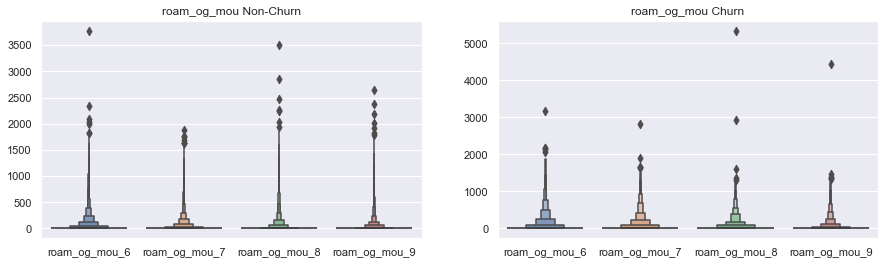

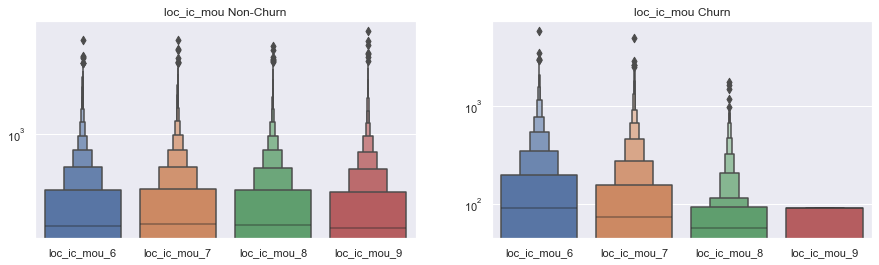

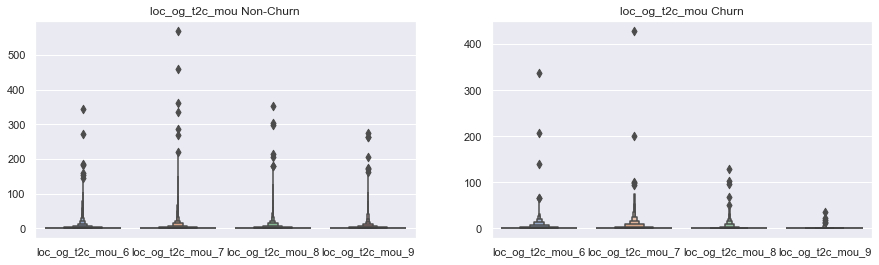

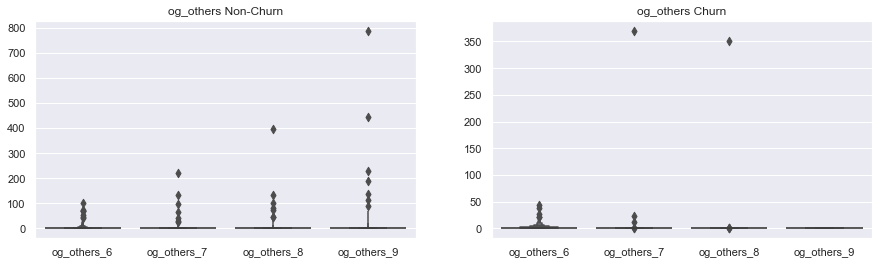

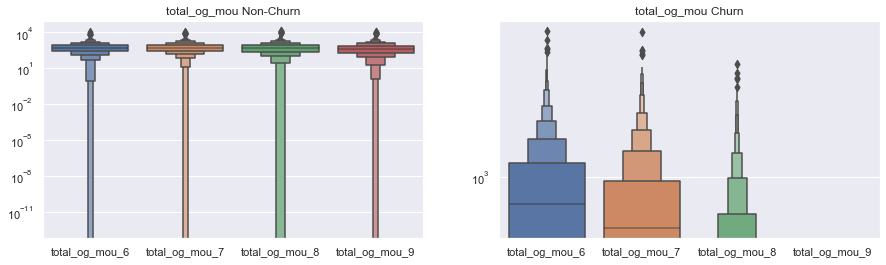

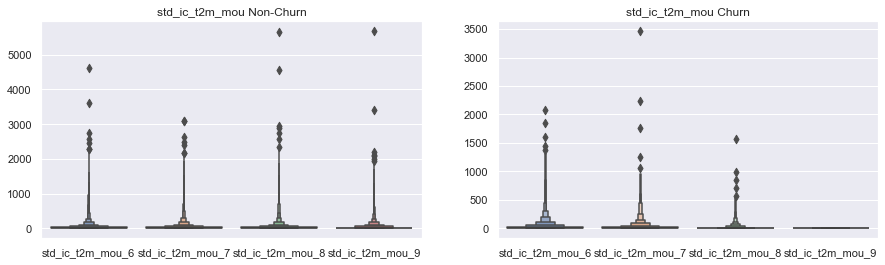

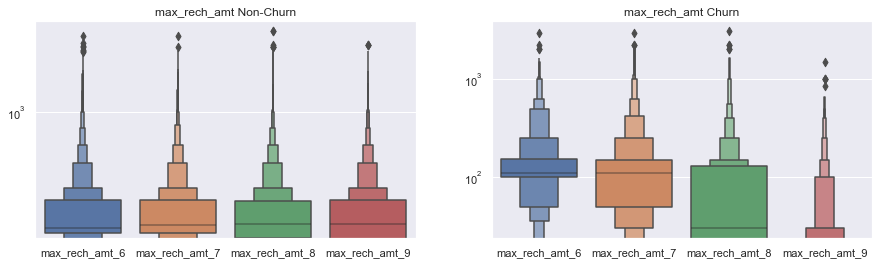

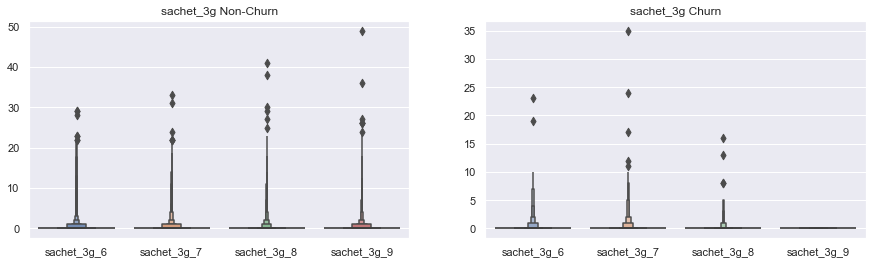

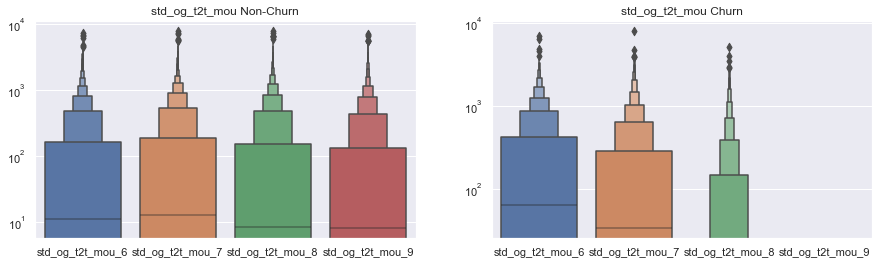

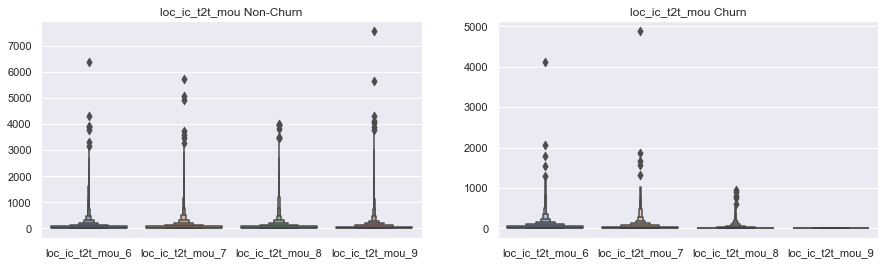

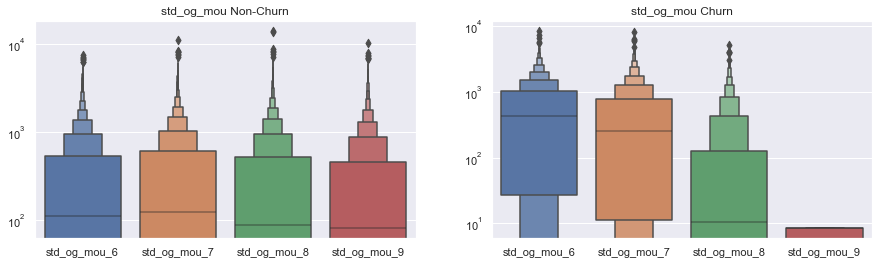

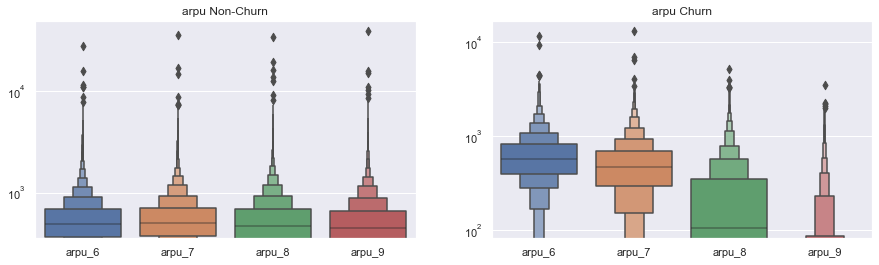

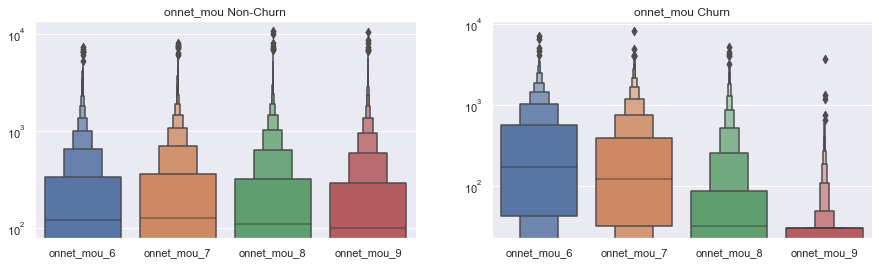

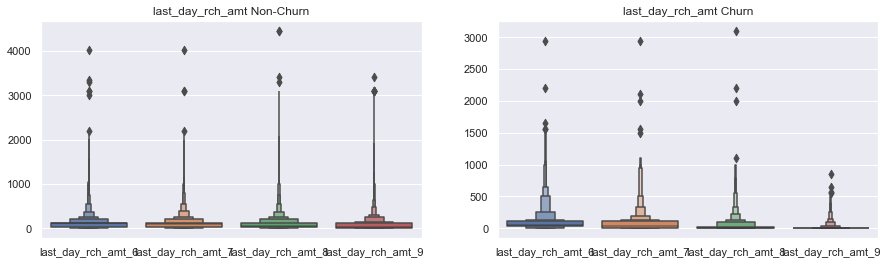

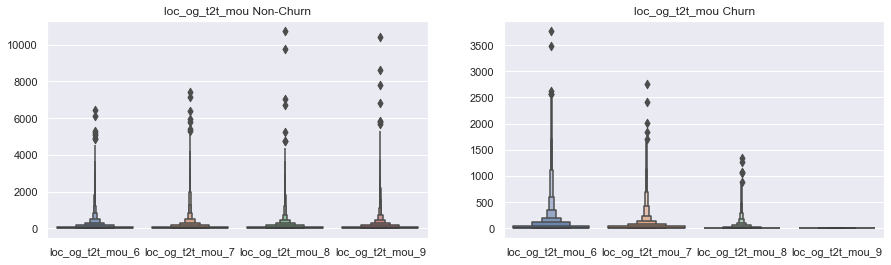

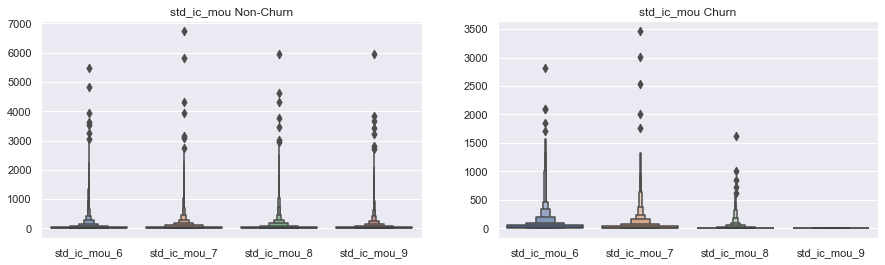

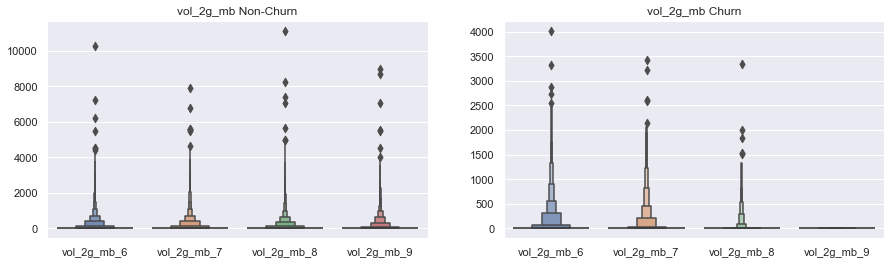

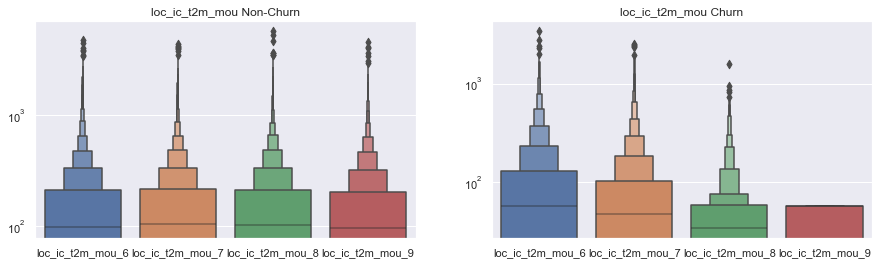

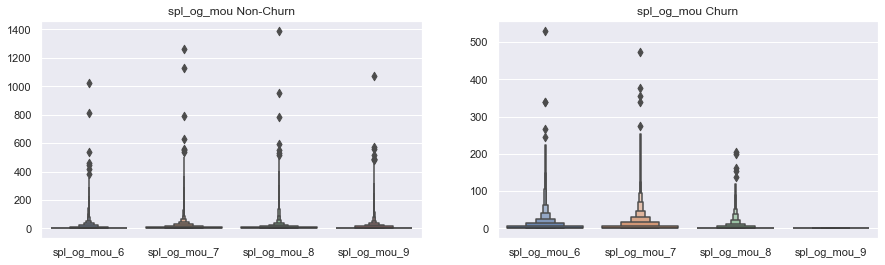

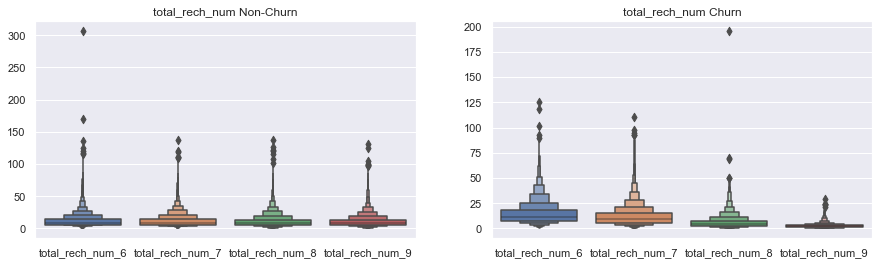

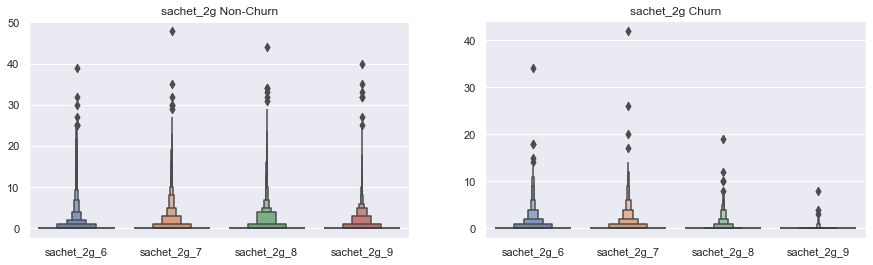

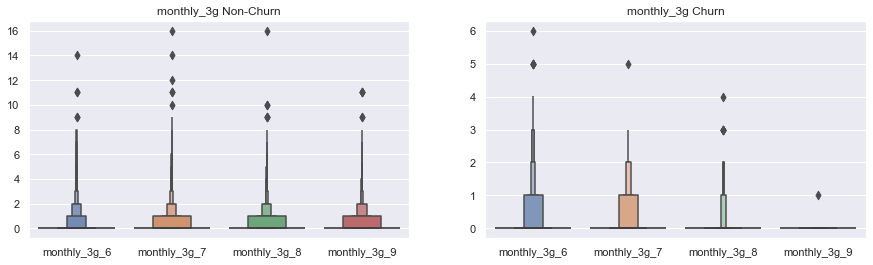

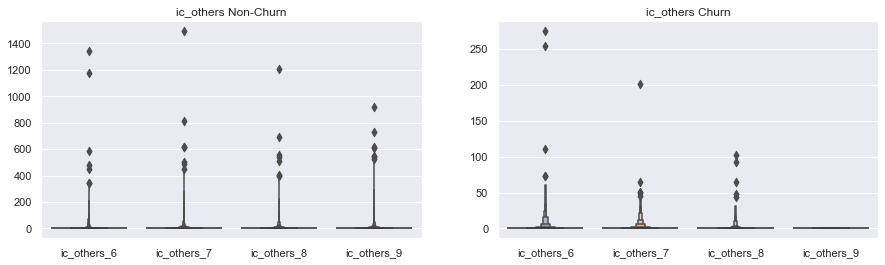

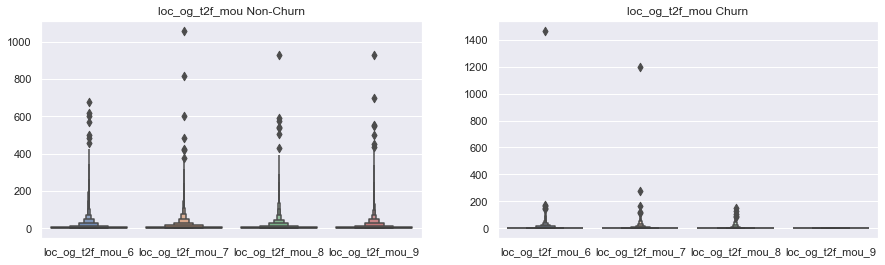

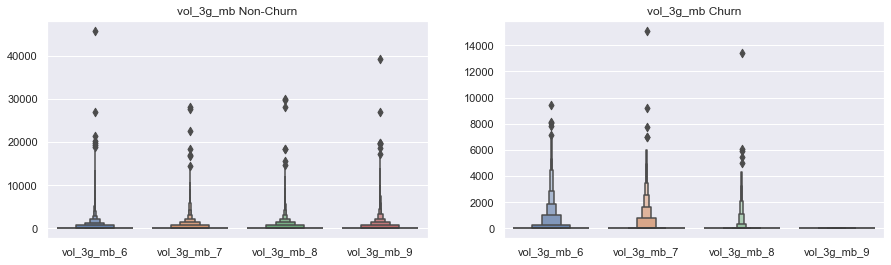

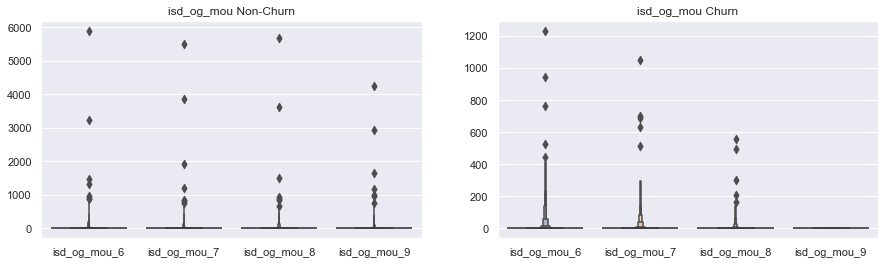

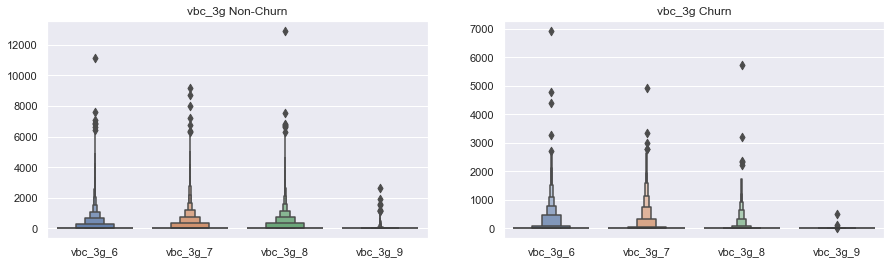

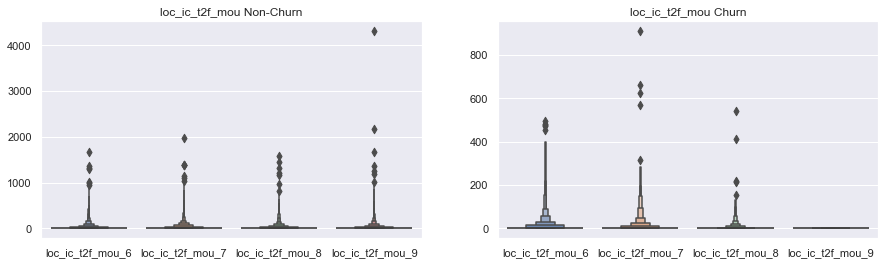

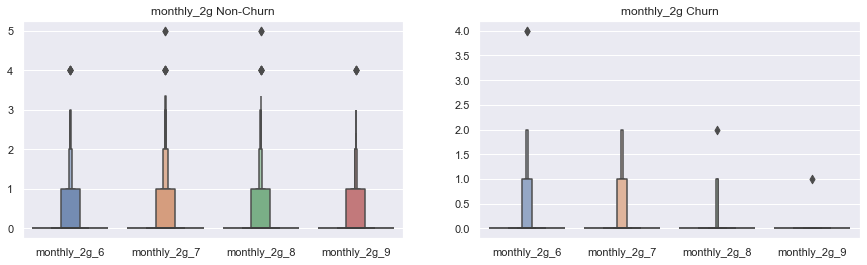

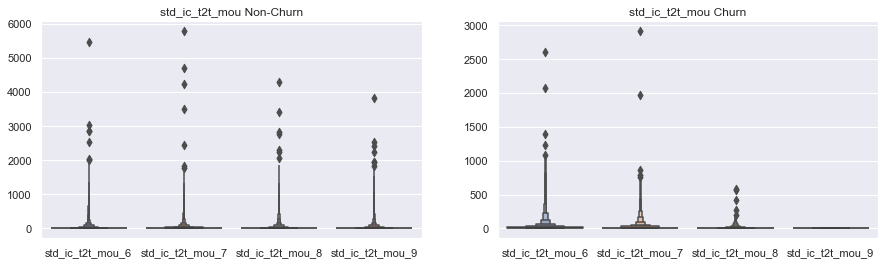

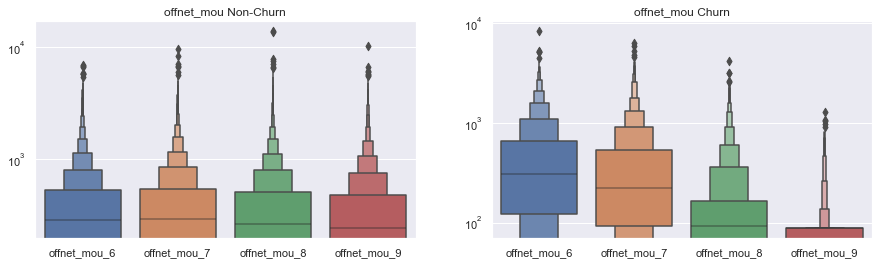

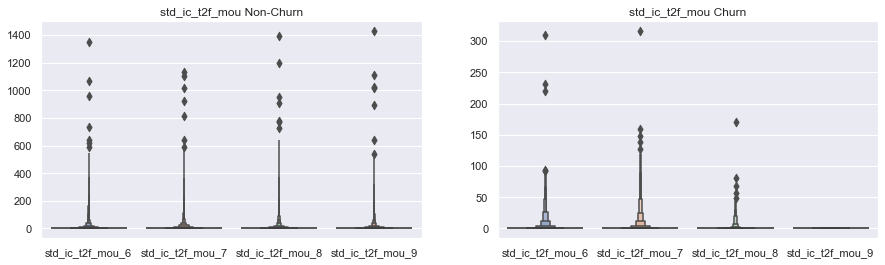

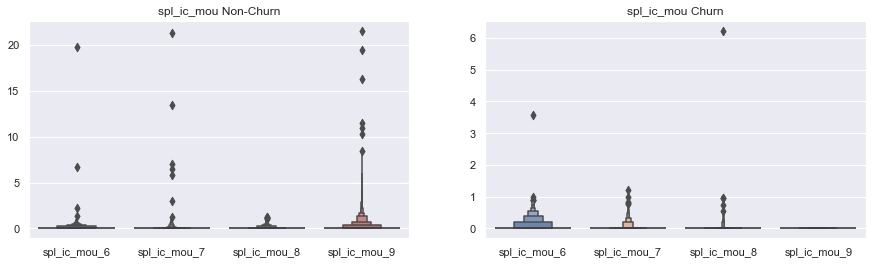

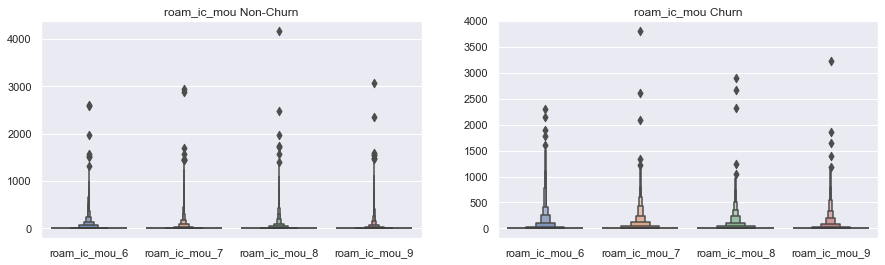

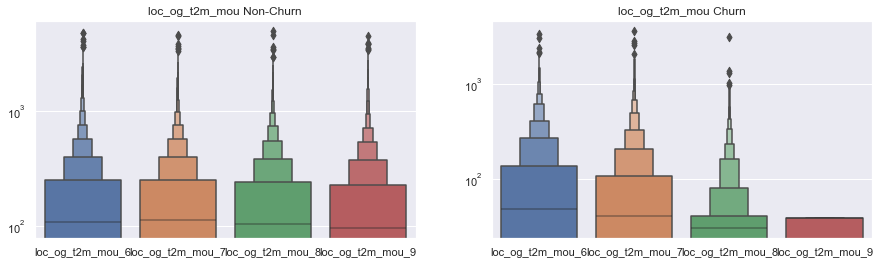

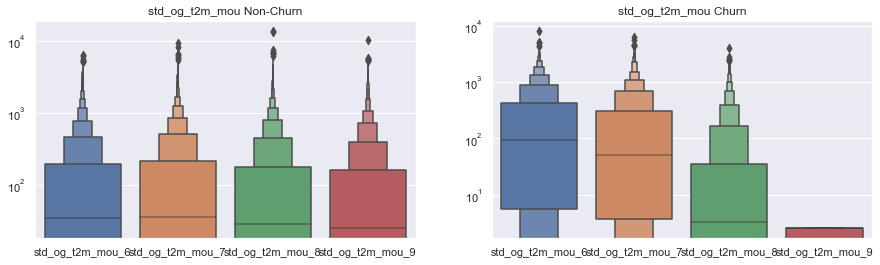

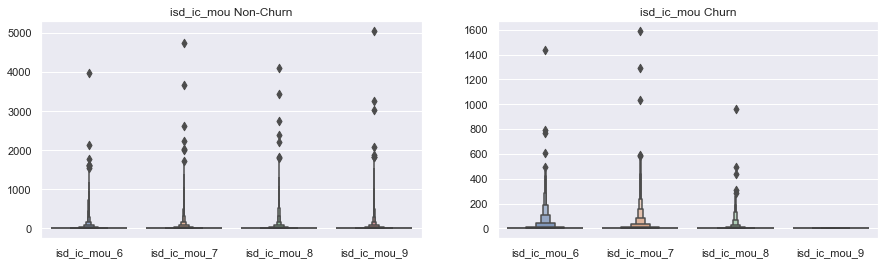

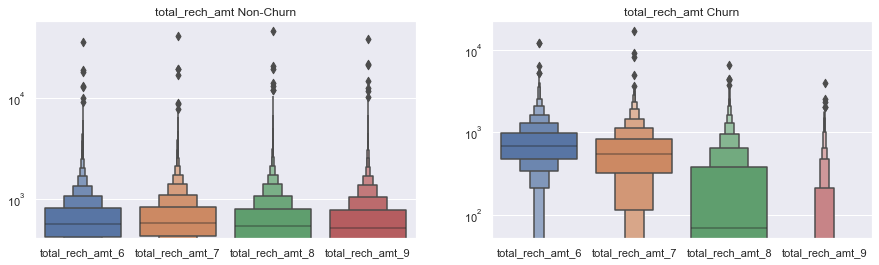

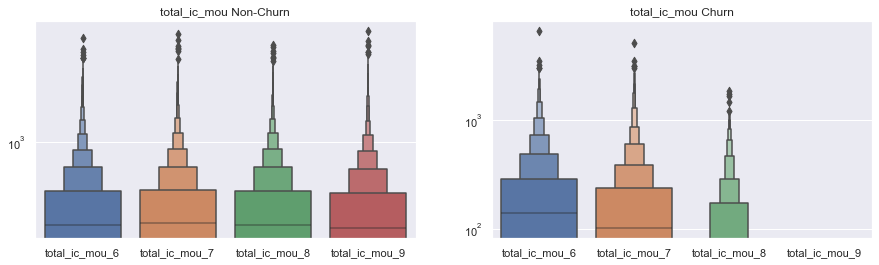

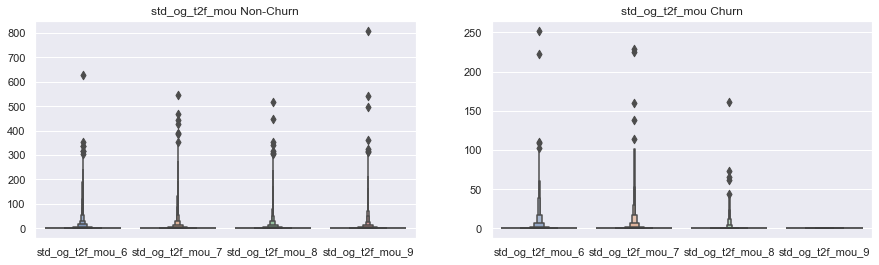

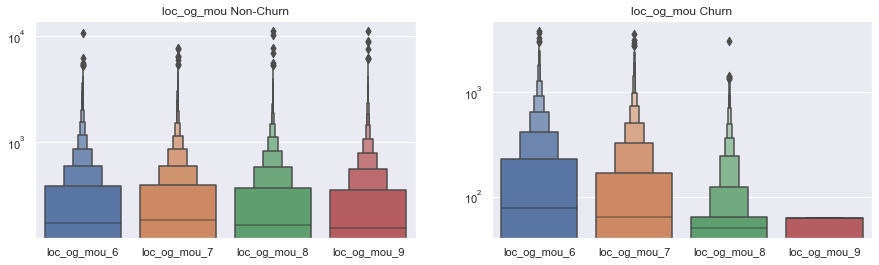

In [37]:
for x in col_name:
    if x != 'date_of_last_rech':
        plt_box(x)

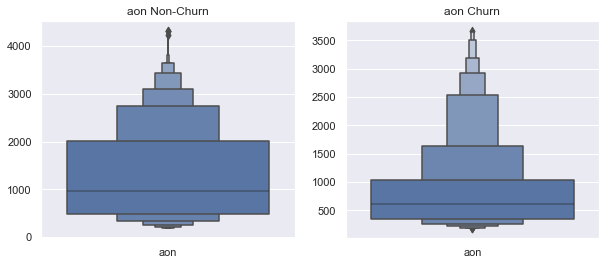

In [38]:
#plot to check age on network column
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title(label= 'aon' +' Non-Churn')
sns.boxenplot(data=high_val[['aon']].loc[high_val['churn'] == 0])
plt.subplot(1,2,2)
plt.title(label= 'aon' +' Churn')
sns.boxenplot(data=high_val[['aon']].loc[high_val['churn'] == 1])
plt.show()

## Obesrvation from EDA

- Age on network is important factor in churn as people on average who churn have spent less time on network than non-churn customers
- Total outgoing/incoming minutes of voice call usage are declining over from good phase(6-7 Months) to action phase  8 month for churn customer 
- Average revenue shows same declining trend of declining from good phase to action phase
- Total recharge amount is constantly dipping for churn customers
- Over all most of the all feature show this behavior of decline via phase

### Deleting all columns from churn phase

In [39]:
churn_phase_col = [i for i in high_val.columns if i[-2:] == '_9']

In [40]:
high_val = high_val.drop(churn_phase_col,axis=1)

In [41]:
high_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29786 entries, 7 to 99988
Columns: 125 entries, arpu_6 to churn
dtypes: float64(99), int64(26)
memory usage: 28.6 MB


In [42]:
high_val.shape

(29786, 125)

## Creating new features based EDA 
Based on EDA we can create new features Phases wise and analyse those. 
Formula is action phase - avg of good phase for each varible

In [43]:
#creating derived phase for all features
for clm in col_name:
    high_val['trd_' + clm] = (high_val[clm + '_8'] - ((high_val[clm + '_6'] + high_val[clm + '_7']) / 2))

In [44]:
high_val[high_val.columns[high_val.columns.to_series().str.contains('trd')]]

,trd_roam_og_mou,trd_loc_ic_mou,trd_loc_og_t2c_mou,trd_og_others,trd_total_og_mou,trd_std_ic_t2m_mou,trd_max_rech_amt,trd_sachet_3g,trd_std_og_t2t_mou,trd_loc_ic_t2t_mou,...,trd_std_ic_t2f_mou,trd_spl_ic_mou,trd_roam_ic_mou,trd_loc_og_t2m_mou,trd_std_og_t2m_mou,trd_isd_ic_mou,trd_total_rech_amt,trd_total_ic_mou,trd_std_og_t2f_mou,trd_loc_og_mou
7,19.895,-203.515,0.000,0.000,-198.225,32.115,395.0,0.0,-1.785,-17.890,...,-21.005,-0.105,6.780,-215.725,8.315,23.295,2453.0,-163.510,3.31,-222.245
8,0.000,-36.840,7.150,0.000,-298.450,-12.605,-92.0,0.0,-102.415,-16.530,...,0.000,0.000,0.000,-25.230,63.825,0.000,-399.0,-49.635,0.00,-270.095
13,-20.180,134.415,0.490,0.000,465.510,148.950,20.0,0.0,232.035,14.850,...,1.910,-0.225,-11.775,195.255,2.790,239.695,337.0,573.935,0.00,224.595
16,-8.870,-41.565,0.000,0.000,-83.030,28.050,20.0,0.0,-2.005,-27.495,...,1.925,0.000,-1.415,-81.360,-25.460,0.230,-299.0,-78.750,0.00,-59.845
17,9.110,-42.135,0.000,-0.465,-625.170,-0.640,-25.0,0.0,-573.860,-17.270,...,0.000,0.000,2.430,-29.270,-0.775,0.000,-378.0,-47.095,0.00,-48.770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99965,-0.030,-19.295,0.000,0.000,-408.735,5.830,-6.0,0.0,-54.060,0.000,...,0.000,0.000,0.000,5.870,-370.190,0.000,-189.0,-22.070,0.00,5.870
99970,-23.020,110.380,17.350,0.000,-13.350,28.845,-11.5,0.0,15.340,9.580,...,0.000,0.000,-2.530,39.770,-94.620,0.000,-55.0,153.030,0.00,49.370
99974,0.000,-48.165,-0.335,-1.540,-46.830,1.545,10.0,0.0,1.300,-6.175,...,-8.120,0.000,0.000,-20.935,-13.645,0.000,-77.0,-55.545,-5.17,-27.290
99986,0.000,43.670,-7.185,0.000,-11.990,17.125,-643.0,0.0,-18.520,25.835,...,-0.915,0.000,0.000,-67.405,-29.895,-0.215,-823.5,58.505,0.00,43.605


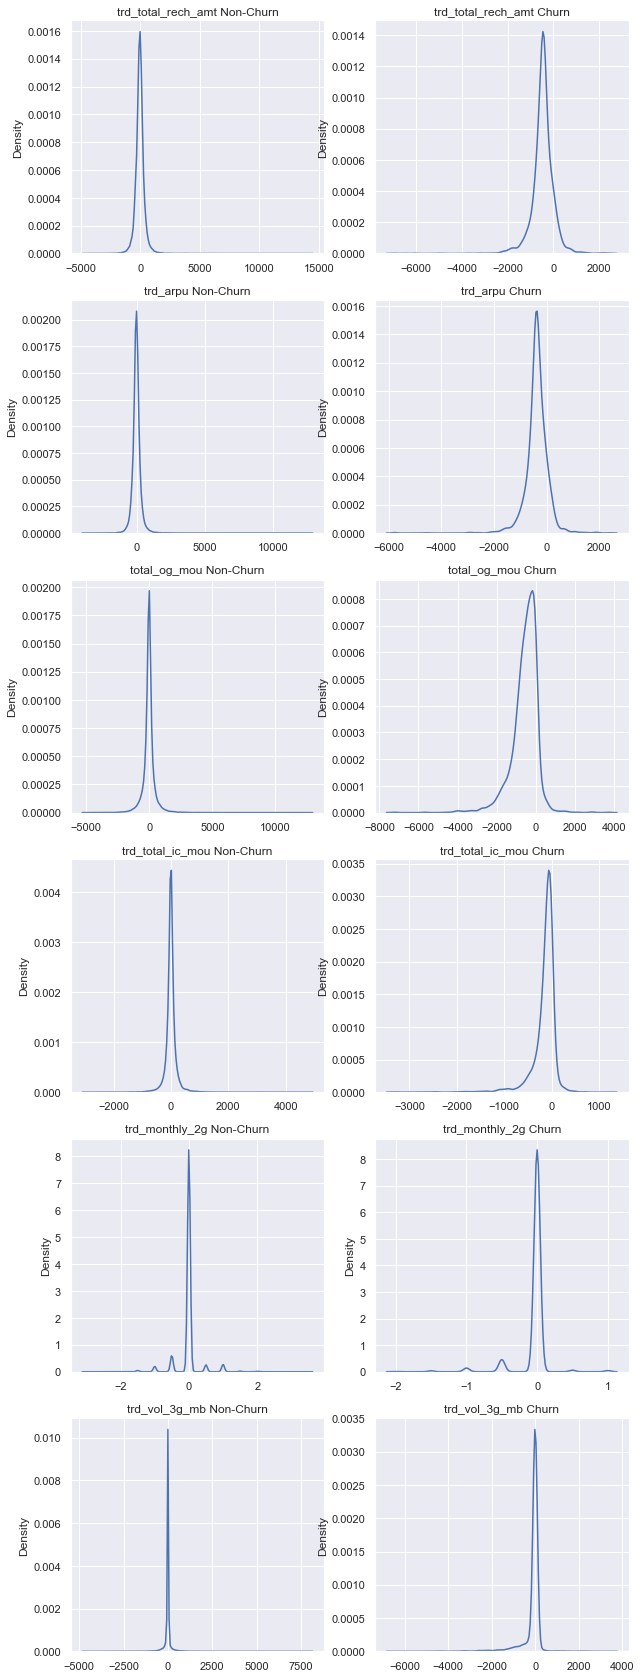

In [45]:
#graphs to check derived varibles
plt.figure(figsize=(10,30))
plt.subplot(6,2,1)
plt.title(label= 'trd_total_rech_amt Non-Churn')
sns.distplot(x=high_val[['trd_total_rech_amt']].loc[high_val['churn'] == 0],hist=False,label='trd_isd_ic_mou')
plt.subplot(6,2,2)
plt.title(label= 'trd_total_rech_amt Churn')
sns.distplot(x=high_val[['trd_total_rech_amt']].loc[high_val['churn'] == 1],hist=False,label='trd_isd_ic_mou')
plt.subplot(6,2,3)
plt.title(label= 'trd_arpu Non-Churn')
sns.distplot(x=high_val[['trd_arpu']].loc[high_val['churn'] == 0],hist=False,label='trd_isd_ic_mou')
plt.subplot(6,2,4)
plt.title(label= 'trd_arpu Churn')
sns.distplot(x=high_val[['trd_arpu']].loc[high_val['churn'] == 1],hist=False,label='trd_isd_ic_mou')
plt.subplot(6,2,5)
plt.title(label= 'total_og_mou Non-Churn')
sns.distplot(x=high_val[['trd_total_og_mou']].loc[high_val['churn'] == 0],hist=False,label='trd_isd_ic_mou')
plt.subplot(6,2,6)
plt.title(label= 'total_og_mou Churn')
sns.distplot(x=high_val[['trd_total_og_mou']].loc[high_val['churn'] == 1],hist=False,label='trd_isd_ic_mou')
plt.subplot(6,2,7)
plt.title(label= 'trd_total_ic_mou Non-Churn')
sns.distplot(x=high_val[['trd_total_ic_mou']].loc[high_val['churn'] == 0],hist=False,label='trd_isd_ic_mou')
plt.subplot(6,2,8)
plt.title(label= 'trd_total_ic_mou Churn')
sns.distplot(x=high_val[['trd_total_ic_mou']].loc[high_val['churn'] == 1],hist=False,label='trd_isd_ic_mou')
plt.subplot(6,2,9)
plt.title(label= 'trd_monthly_2g Non-Churn')
sns.distplot(x=high_val[['trd_monthly_2g']].loc[high_val['churn'] == 0],hist=False,label='trd_isd_ic_mou')
plt.subplot(6,2,10)
plt.title(label= 'trd_monthly_2g Churn')
sns.distplot(x=high_val[['trd_monthly_2g']].loc[high_val['churn'] == 1],hist=False,label='trd_isd_ic_mou')
plt.subplot(6,2,11)
plt.title(label= 'trd_vol_3g_mb Non-Churn')
sns.distplot(x=high_val[['trd_vol_2g_mb']].loc[high_val['churn'] == 0],hist=False,label='trd_isd_ic_mou')
plt.subplot(6,2,12)
plt.title(label= 'trd_vol_3g_mb Churn')
sns.distplot(x=high_val[['trd_vol_3g_mb']].loc[high_val['churn'] == 1],hist=False,label='trd_isd_ic_mou')
plt.show()

These dervied columns clearly shows that in churn phase the differnece between amount and usage of churn customer is decreased.

In [46]:
high_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29786 entries, 7 to 99988
Columns: 166 entries, arpu_6 to trd_loc_og_mou
dtypes: float64(140), int64(26)
memory usage: 38.0 MB


## Pre Model Building steps
This phase below important stpes will be carried
- Split train test split
- standardize data
- handle imbalance

In [47]:
# Putting feature variable to X
X = high_val.drop(['churn'],axis=1)

# Putting target variable to y
y = high_val['churn']

In [48]:
# standardize data
from sklearn import preprocessing
X_scaler = preprocessing.StandardScaler().fit(X)
X_Scale =X_scaler.transform(X)

In [49]:
X_df = pd.DataFrame(X_Scale,columns=X.columns)
X_df.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,trd_std_ic_t2f_mou,trd_spl_ic_mou,trd_roam_ic_mou,trd_loc_og_t2m_mou,trd_std_og_t2m_mou,trd_isd_ic_mou,trd_total_rech_amt,trd_total_ic_mou,trd_std_og_t2f_mou,trd_loc_og_mou
count,2.978600e+04,2.978600e+04,2.978600e+04,2.978600e+04,2.978600e+04,2.978600e+04,2.978600e+04,2.978600e+04,2.978600e+04,2.978600e+04,...,2.978600e+04,2.978600e+04,2.978600e+04,2.978600e+04,2.978600e+04,2.978600e+04,2.978600e+04,2.978600e+04,2.978600e+04,2.978600e+04
mean,-3.491019e-17,3.632378e-17,1.370354e-17,-4.723088e-17,4.505599e-17,-3.255079e-17,2.939747e-17,1.648748e-16,-9.393062e-17,8.474517e-16,...,9.906642e-16,-7.399909e-16,6.932846e-16,-1.201121e-17,1.583958e-16,-5.377397e-16,2.528995e-18,2.087306e-18,-1.259803e-15,3.558484e-17
std,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,...,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00
min,-6.430208e+00,-5.617480e+00,-3.005485e+00,-6.447409e-01,-6.338221e-01,-5.773802e-01,-8.932153e-01,-8.759954e-01,-7.961405e-01,-2.202582e-01,...,-4.492872e+01,-9.063312e+01,-2.237779e+01,-1.874550e+01,-2.229081e+01,-3.052873e+01,-1.612753e+01,-1.473956e+01,-3.849368e+01,-1.744937e+01
25%,-5.041118e-01,-4.833373e-01,-4.965219e-01,-5.551873e-01,-5.483232e-01,-5.081243e-01,-6.000693e-01,-5.960647e-01,-5.937474e-01,-2.202582e-01,...,7.661636e-03,8.180535e-02,3.285285e-02,-2.229140e-01,-4.066015e-02,1.315846e-03,-4.473127e-01,-2.670669e-01,2.926155e-02,-2.278617e-01
50%,-2.063207e-01,-2.061841e-01,-1.680644e-01,-3.710892e-01,-3.723752e-01,-3.628280e-01,-2.906690e-01,-2.934961e-01,-2.866544e-01,-2.202582e-01,...,1.754770e-02,8.180535e-02,3.285285e-02,4.921818e-02,8.785965e-02,1.315846e-03,2.827235e-02,2.928300e-02,2.926155e-02,5.741658e-02
75%,2.639189e-01,2.405299e-01,2.763915e-01,1.250011e-01,1.167528e-01,6.371368e-02,2.234393e-01,2.232043e-01,2.215311e-01,-2.202582e-01,...,1.754770e-02,8.180535e-02,3.285285e-02,2.578608e-01,1.214446e-01,1.315846e-03,4.416204e-01,2.843721e-01,2.926155e-02,2.629340e-01
max,6.129314e+01,7.450463e+01,6.691083e+01,1.532748e+01,1.626253e+01,2.243495e+01,1.686310e+01,1.897383e+01,2.858808e+01,3.269450e+01,...,7.227901e+01,2.487796e+01,3.382702e+01,2.085564e+01,4.043613e+01,6.886982e+01,3.388406e+01,2.178435e+01,4.161290e+01,2.105180e+01


In [50]:
from sklearn.model_selection import train_test_split

In [51]:
#test train split
X_train, X_test, y_train, y_test = train_test_split(X_Scale,y,train_size = 0.8, random_state = 0,stratify = y)

In [52]:
print('y_train')
print(y_train.value_counts())
print('y_train')
print(y_test.value_counts())

y_train
0    21783
1     2045
Name: churn, dtype: int64
y_train
0    5447
1     511
Name: churn, dtype: int64


## Class Imbalance handeling
Since this dataset has imbalnce , more non churn customer this will affect in model buinding predections so will handle it using smote method

In [53]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train,y_train = sm.fit_resample(X_train,y_train)

In [54]:
y_test.value_counts()

0    5447
1     511
Name: churn, dtype: int64

In [55]:
y_train.value_counts()

0    21783
1    21783
Name: churn, dtype: int64

After applying smote the number of churn records are increased.

## PCA
Since we have many features and lot of correlation between features, we can reduce dimentionality using PCA method.
Will Use scree plot to determine number of PCA compomet we can choose to build model

In [56]:
# impoting PCA from sklearn
from sklearn.decomposition import PCA

In [57]:
#Fitting the PCA
pca = PCA(random_state=42)
pca.fit(X_train)

PCA(random_state=42)

In [58]:
pca.components_

array([[ 8.54345893e-02,  1.79275030e-03, -1.15264710e-01, ...,
        -9.61587037e-02, -3.30835130e-03, -8.32723388e-02],
       [ 1.57931051e-01,  1.83408908e-01,  1.73545466e-01, ...,
        -3.25276785e-02, -1.50069967e-02, -4.18384959e-02],
       [ 1.18222504e-02, -6.63099909e-02, -1.13935993e-01, ...,
        -1.94278248e-01, -2.20041434e-02, -1.54284852e-01],
       ...,
       [-0.00000000e+00, -4.56900734e-16,  6.41798942e-16, ...,
        -4.36097478e-02,  1.49663981e-02,  9.84280990e-03],
       [-0.00000000e+00,  1.52710452e-16,  3.22572348e-16, ...,
         9.84620961e-04, -6.99526062e-02,  4.77553287e-02],
       [ 0.00000000e+00, -4.94329844e-16,  1.14128429e-15, ...,
         5.82790506e-03,  3.31765428e-03, -4.91435357e-02]])

In [59]:
#continous sum of variance ratio
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.09539172, 0.16301126, 0.22354406, 0.27189131, 0.31241308,
       0.35034429, 0.38409865, 0.41532681, 0.44264542, 0.46788974,
       0.49027739, 0.50982513, 0.52865356, 0.54547584, 0.56169789,
       0.57723857, 0.59241596, 0.60677294, 0.62071348, 0.63429002,
       0.64767646, 0.66013713, 0.67235397, 0.68453154, 0.6962793 ,
       0.70736314, 0.71777682, 0.72784089, 0.73774731, 0.74746234,
       0.75687108, 0.76586815, 0.77461192, 0.78292008, 0.79106027,
       0.79873469, 0.80615203, 0.81320635, 0.82013519, 0.82685757,
       0.83329906, 0.83966753, 0.84590747, 0.85207042, 0.85808484,
       0.86399583, 0.86989075, 0.87562137, 0.88106169, 0.88612012,
       0.89114877, 0.89592723, 0.90057618, 0.9051315 , 0.90961005,
       0.9140532 , 0.91836054, 0.92264039, 0.92677501, 0.93069792,
       0.93456546, 0.93825221, 0.94176628, 0.94508072, 0.94823899,
       0.95136828, 0.95435984, 0.95732248, 0.9602729 , 0.96277756,
       0.96497017, 0.96704707, 0.96904266, 0.97095971, 0.97284

As per this 95% variance is explained by 66 PCA componets

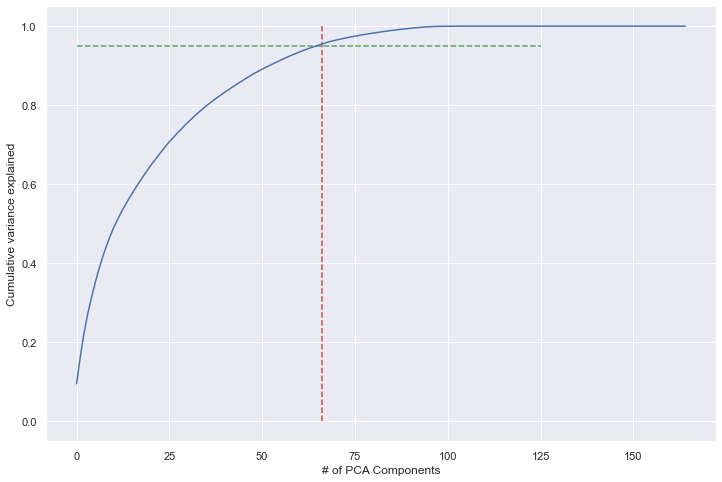

In [60]:
#graoh to show cumulative variance by PCA 
fig = plt.figure(figsize=[12,8])
plt.vlines(x=66, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=125, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.xlabel("# of PCA Components")
plt.ylabel("Cumulative variance explained")
plt.show()

Based on above analysis 67 PCA componet is selected to build final model.

In [61]:
#Final PCA model using 66 componet
pca_final = PCA(n_components=66,random_state=42)

In [62]:
#Training model
X_train_pca = pca_final.fit_transform(X_train)

In [63]:
X_train_pca.shape

(43566, 66)

In [64]:
#fitting PCA on test set
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(5958, 66)

## Model using PCA
Actual Model builing starts here I am going to use Random forest classifier.
First we will train model using PCA componets and default parameters for model later we will do hyperparameter tuning to impovement

In [65]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [66]:
rfc.fit(X_train_pca,y_train)

RandomForestClassifier()

In [67]:
# Making predictions
pred = rfc.predict(X_test_pca)

In [68]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [69]:
# Let's check the report of our default model
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      5447
           1       0.48      0.62      0.54       511

    accuracy                           0.91      5958
   macro avg       0.72      0.78      0.75      5958
weighted avg       0.92      0.91      0.92      5958



In [70]:
# Printing confusion matrix
print(confusion_matrix(y_test,pred))

[[5104  343]
 [ 193  318]]


In [71]:
print(accuracy_score(y_test,pred))

0.9100369251426653


Model Highlights
- Good accuracy score of 90% 
- Precision and recall is good for non churn but less for churn cases
based on this we will do hyper parameter tuning next

### Hyperparameter Tuning
As this business problem predecting churn is high priority so Recall rate is important. will try to improve recall rate in this section

In [72]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

Paramets selectec are Max depth,n estimators and min sample split

In [75]:
param_grid = {
    'max_depth': [10,15,20],
    'n_estimators': [150,200, 250],
    'min_samples_split': [3,5,7]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 3,
                           verbose = 1,
                           n_jobs = -1,
                           scoring="recall",
                           return_train_score=True)

In [ ]:
#fitting the gridsearch
grid_search.fit(X_train_pca,y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


In [ ]:
#Capturing the score from gridsearch
scores = grid_search.cv_results_

In [ ]:
#converting to dataframe
scores_df = pd.DataFrame(scores)

In [ ]:
#Checking the result
scores_df[['param_max_depth','param_min_samples_split','param_n_estimators','mean_test_score','mean_train_score']]

Based on Hyperparaeter tuning we will create our final model and evaluate it

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.lineplot(x=scores_df['param_max_depth'],y= scores_df['mean_test_score'])
plt.subplot(1,3,2)
sns.lineplot(x=scores_df['param_min_samples_split'],y= scores_df['mean_test_score'])
plt.subplot(1,3,3)
sns.lineplot(x=scores_df['param_n_estimators'],y= scores_df['mean_test_score'])
plt.show()

Based on parametr tuning we can use
- param_max_depth = 20
- param_min_samples_split = 3
- param_n_estimators = 250

In [ ]:
#final model using hyperparamete test result
rfc_final = RandomForestClassifier(bootstrap=True,
                             max_depth=20,
                             min_samples_split=3,
                             n_estimators = 250
                             )
rfc_final.fit(X_train_pca,y_train)

In [ ]:
# Predection using final model
pred_final = rfc_final.predict(X_test_pca)

## Model evaluation

In [ ]:
# confusion_matrix for Final model
print(confusion_matrix(y_test,pred_final))

In [ ]:
# confusion_matrix for model without hyper tuning
print(confusion_matrix(y_test,pred))

In [ ]:
# Classifincation and Accuracy score for final model
print(classification_report(y_test,pred_final))
print(accuracy_score(y_test,pred_final))

In [ ]:
# Classifincation and Accuracy score for model without tuning
print(classification_report(y_test,pred))
print(accuracy_score(y_test,pred))

With hyperparameter tuning we were able to increase recall rate from 60% to 65 % without impacting the Accuracy which is around 90% We can finlize this model

## Second model to identify important predictors in Churn 
for this excerise i will use Decison Tree model its excellent for explaing purpose. We can even draw tree diagram to show business for better undersating.
For this will use data from data imbalance handle step(SMOTE)
This is new model without PCA so we need another feature redcution techinique like RFE

In [ ]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE

In [ ]:
# RFE with 15 variables as output
dt = DecisionTreeClassifier()
rfe = RFE(dt, 15)
rfe = rfe.fit(X_train,y_train)

In [ ]:
list(zip(X_df.columns,rfe.support_,rfe.ranking_))

In [ ]:
# Variables selected by RFE 
col = X_df.columns[rfe.support_]
col

In [ ]:
#Converting X train into Dataframe so we can select columns accordigly
X_train = pd.DataFrame(X_train,columns= X_df.columns)
X_train

In [ ]:
#Converting X Test into Dataframe so we can select columns accordigly
X_train_rfe =  X_train[col]
X_train_rfe

In [ ]:
#Selecting columns based on RFE
X_test_rfe =  X_test[col]
X_test_rfe

In [ ]:
# DT using REF selected feature
dt_rfe = DecisionTreeClassifier(max_depth=5)
dt_rfe.fit(X_train_rfe, y_train)

In [ ]:
# Making predictions
y_pred_dt = dt_rfe.predict(X_test_rfe)

# Printing classification report
print(classification_report(y_test, y_pred_dt))

In [ ]:
print(accuracy_score(y_test,y_pred_dt))

In [ ]:
tree.fit(X_train_rfe, y_train)

In [ ]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO 
from sklearn.tree import export_graphviz
import pydotplus, graphviz



In [ ]:
# Column names
features = list(X_train_rfe.columns)
features

In [ ]:
# Ploting Decion tree chart
dot_data = StringIO()  
export_graphviz(dt_rfe, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Summary 

- First model which was built using PCA and Random forest with Hyperparanmeter tuning has 90% Accuracy. This can be used for predection purpose
- Second model was build using Decison tree with REF techique , the accuracy score is 86 % and it has given below impratnt feature

------------------------------------

- onnet_mou_8,
- roam_ic_mou_8,
- roam_og_mou_8,
- spl_og_mou_7,
- loc_ic_mou_8,
- total_ic_mou_8,
- total_rech_num_6,
- total_rech_amt_8,
- last_day_rch_amt_7,
- last_day_rch_amt_8,
- aon,
- trd_std_og_t2t_mou,
- trd_total_rech_amt,
- trd_spl_ic_mou,
- trd_total_ic_mou

#### Based on these feature company can identify customers who has reduced all call , reduced the recharge amount those customers has high chances of Churn. Company can identify them and check their concerns and make some offer to retain them